<a href="https://colab.research.google.com/github/ribka-5/Statistika-Sains-Data/blob/main/Tugas_Besar_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


### **DATA FRAME**

In [ ]:
df = pd.read_csv('covid.csv')
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [ ]:
df.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

### **DATA WRANGLING**

In [ ]:
negara = df['location'].unique()
print('Jumlah dan List Negara:' ,len(negara))
for country in enumerate(negara):
  print(country[0] + 1 , country[1])

Jumlah dan List Negara: 121
1 Angola
2 Argentina
3 Aruba
4 Australia
5 Austria
6 Bahrain
7 Bangladesh
8 Belgium
9 Belize
10 Benin
11 Bosnia and Herzegovina
12 Botswana
13 Brazil
14 Brunei
15 Bulgaria
16 Cambodia
17 Cameroon
18 Canada
19 Chile
20 Colombia
21 Costa Rica
22 Croatia
23 Curacao
24 Cyprus
25 Czechia
26 Denmark
27 Djibouti
28 Dominican Republic
29 Ecuador
30 Egypt
31 Estonia
32 Ethiopia
33 Fiji
34 Finland
35 France
36 Gambia
37 Georgia
38 Germany
39 Ghana
40 Greece
41 Guatemala
42 Hong Kong
43 Hungary
44 Iceland
45 India
46 Indonesia
47 Iran
48 Iraq
49 Ireland
50 Israel
51 Italy
52 Jamaica
53 Japan
54 Jordan
55 Kazakhstan
56 Kenya
57 Kosovo
58 Kuwait
59 Latvia
60 Lebanon
61 Liechtenstein
62 Lithuania
63 Luxembourg
64 Madagascar
65 Malawi
66 Malaysia
67 Maldives
68 Malta
69 Mauritius
70 Mexico
71 Moldova
72 Monaco
73 Mongolia
74 Montenegro
75 Morocco
76 Mozambique
77 Nepal
78 Netherlands
79 New Zealand
80 Nigeria
81 North Macedonia
82 Norway
83 Oman
84 Pakistan
85 Papua New Gu

In [ ]:
varian = df['variant'].unique()
print('Jumlah dan List varian covid:' ,len(varian))
for v in enumerate(varian):
  print(v[0] + 1 , v[1])

Jumlah dan List varian covid: 24
1 Alpha
2 B.1.1.277
3 B.1.1.302
4 B.1.1.519
5 B.1.160
6 B.1.177
7 B.1.221
8 B.1.258
9 B.1.367
10 B.1.620
11 Beta
12 Delta
13 Epsilon
14 Eta
15 Gamma
16 Iota
17 Kappa
18 Lambda
19 Mu
20 Omicron
21 S:677H.Robin1
22 S:677P.Pelican
23 others
24 non_who


### **DATA VISUALIZATION**

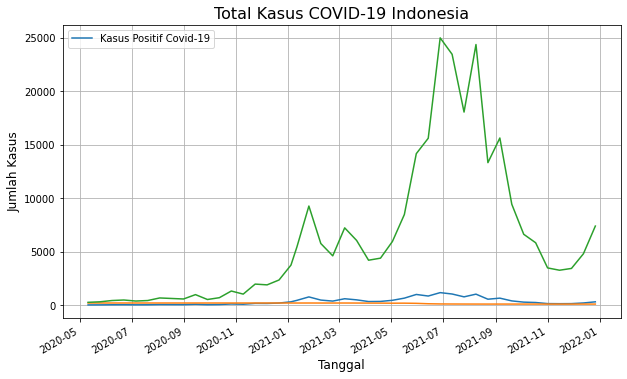

In [ ]:
df1 = df.groupby(['location','date']).sum()
df1 = df1.loc['Indonesia'].reset_index()
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.set_index('date')

plt.figure( figsize=(10,6) )
ax = plt.gca()
df1.plot(ax=ax)
ax.grid()
ax.set_xlabel('Tanggal',fontsize=12)
ax.set_ylabel('Jumlah Kasus',fontsize=12)
ax.legend(['Kasus Positif Covid-19'])
ax.set_title('Total Kasus COVID-19 Indonesia',fontsize=16)
plt.show()

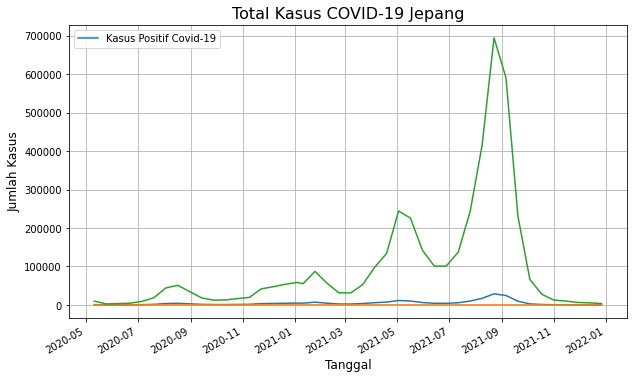

In [ ]:
df2 = df.groupby(['location','date']).sum()
df2 = df2.loc['Japan'].reset_index()
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.set_index('date')
# Plot
plt.figure( figsize=(10,6) )
ax = plt.gca()
df2.plot(ax=ax)
ax.grid()
ax.set_xlabel('Tanggal',fontsize=12)
ax.set_ylabel('Jumlah Kasus',fontsize=12)
ax.legend(['Kasus Positif Covid-19'])
ax.set_title('Total Kasus COVID-19 Jepang',fontsize=16)
plt.show()

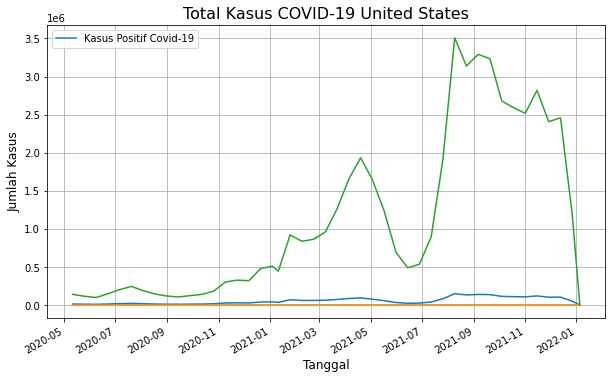

In [ ]:
data = df.groupby(['location','date']).sum()
data = data.loc['United States'].reset_index()
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
# Plot
plt.figure( figsize=(10,6) )
ax = plt.gca()
data.plot(ax=ax)
ax.grid()
ax.set_xlabel('Tanggal',fontsize=12)
ax.set_ylabel('Jumlah Kasus',fontsize=12)
ax.legend(['Kasus Positif Covid-19'])
ax.set_title('Total Kasus COVID-19 United States',fontsize=16)
plt.show()

In [ ]:
df_per_variant = df[ ['variant','date' , 'num_sequences'] ].groupby(['variant']).sum()
df_per_variant.drop( df_per_variant[df_per_variant.index=='non_who'].index ,inplace=True)
df_per_variant.sort_values(['num_sequences'],ascending=[False],inplace=True)
df_per_variant.reset_index(inplace=True)

In [ ]:
df_per_variant

,variant,num_sequences
0,Delta,3834100
1,Alpha,1132595
2,others,642603
3,B.1.177,170457
4,Omicron,115538
5,Gamma,115156
6,Epsilon,66127
7,Iota,42905
8,Beta,40514
9,B.1.160,34019


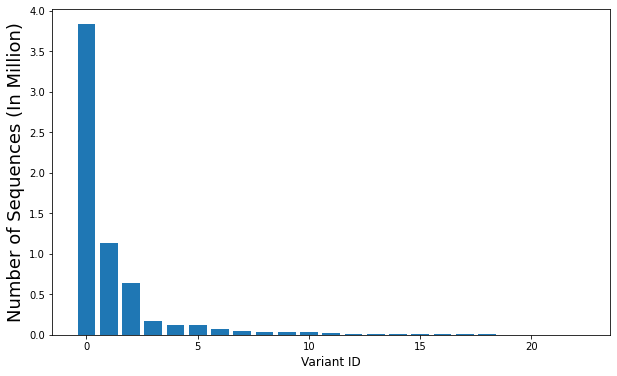

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(df_per_variant.index,df_per_variant['num_sequences'].apply(lambda x:x/10**6).values)
plt.xlabel('Variant ID',fontsize=12)
plt.ylabel('Number of Sequences (In Million)',fontsize=18)
# plt.yticks([10**5 , 10**6])
plt.show()

In [ ]:
seq_negara = df[['location','date','num_sequences_total',]].groupby(['location','date']).mean()
seq_negara = seq_negara.groupby(['location']).sum()
seq_negara['num_sequences_total'] = seq_negara['num_sequences_total'].apply(lambda x: round(x))
seq_negara

,num_sequences_total
location,
Angola,1055
Argentina,8411
Aruba,3000
Australia,47199
Austria,12580
...,...
United States,2081677
Uruguay,682
Vietnam,1805


In [ ]:
seq_negara.sort_values(by=["num_sequences_total"], ascending=False)

,num_sequences_total
location,
United States,2081677
United Kingdom,1559482
Germany,327143
Denmark,280370
Canada,181885
...,...
Belize,314
Iraq,167
Moldova,152


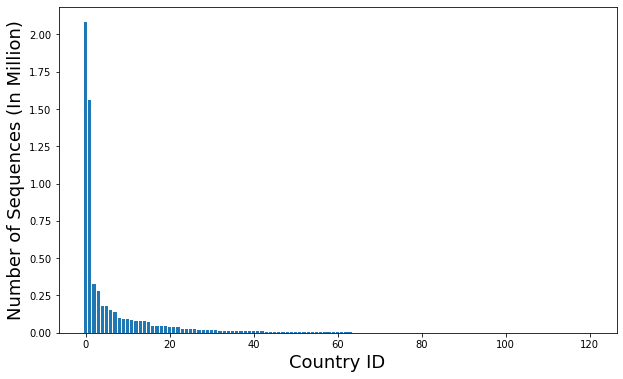

In [ ]:
df_country.sort_values(['num_sequences_total'],ascending=[False],inplace=True)
df_country.reset_index(inplace=True)
plt.figure(figsize=(10,6))
plt.bar(df_country.index,df_country['num_sequences_total'].apply(lambda x:(x/10**6)).values)
plt.xlabel('Country ID',fontsize=18)
plt.ylabel('Number of Sequences (In Million)',fontsize=18)
# plt.yticks([10**5 , 10**6])
plt.show()

In [ ]:
df3 = df.drop( df[df['variant']=='non_who'].index )
df_date = df3[['date','num_sequences']].groupby('date').sum()
df_date.reset_index(inplace=True)
df_date['date'] = pd.to_datetime(df_date['date'])
df_date['date'] = df_date['date'].apply(lambda x: '{year}-{month}'.format(year= x.year, month = x.month) )
df_month = df_date.groupby(['date']).sum()
df_month

,num_sequences
date,
2020-10,62589
2020-11,94010
2020-12,113029
2020-5,29339
2020-6,25820
2020-7,34185
2020-8,55679
2020-9,41287
2021-1,239973


### **DATA PROCESSING**

In [ ]:
df4 = df3.groupby(['location','variant']).sum()
df4

num_sequences  perc_sequences  num_sequences_total
location variant                                                           
Angola   Alpha                     156          382.66                 1055
         B.1.1.277                   0            0.00                 1055
         B.1.1.302                   0            0.00                 1055
         B.1.1.519                   0            0.00                 1055
         B.1.160                     3            6.86                 1055
...                                ...             ...                  ...
Zimbabwe Mu                          0            0.00                  686
         Omicron                     0            0.00                  686
         S:677H.Robin1               0            0.00                  686
         S:677P.Pelican              0            0.00                  686
         others                    185          958.60                  686

[2783 rows x 3 columns]

In [ ]:
df5 = df4.query("variant=='Omicron' | variant=='Alpha' | variant=='Delta' ")
df5.reset_index(inplace=True)
df5

,location,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,Alpha,156,382.66,1055
1,Angola,Delta,160,687.30,1055
2,Angola,Omicron,0,0.00,1055
3,Argentina,Alpha,366,131.45,8411
4,Argentina,Delta,1615,555.06,8411
...,...,...,...,...,...
358,Zambia,Delta,374,906.28,1117
359,Zambia,Omicron,46,200.00,1117
360,Zimbabwe,Alpha,0,0.00,686
361,Zimbabwe,Delta,147,961.11,686


In [ ]:
locations = df5[['location']]
negara = locations['location'].unique()
alpas = df5[df5['variant']=='Alpha']
a = alpas[['num_sequences']].values.flatten()
omicrons = df5[df5['variant']=='Omicron']
o= omicrons[['num_sequences']].values.flatten()
deltas = df5[df5['variant']=='Delta']
d = deltas[['num_sequences']].values.flatten()

datas = {
    'Negara': negara,
    'Omicron': o,
    'Alpha':a,
    'Delta':d,
}
new_data = pd.DataFrame(datas)
new_data

,Negara,Omicron,Alpha,Delta
0,Angola,0,156,160
1,Argentina,93,366,1615
2,Aruba,0,551,1764
3,Australia,1693,613,29128
4,Austria,34,3563,6567
...,...,...,...,...
116,United States,28536,239829,1327443
117,Uruguay,0,0,0
118,Vietnam,1,11,1787
119,Zambia,46,8,374


### **CLSUTERING**

In [ ]:
df2 = new_data.copy()
df2 = df2.assign(kluster=np.zeros_like(new_data['Alpha'].values))

klus1 = df2.query('Omicron < 1000 or Alpha < 5000 or Delta < 10000 ')
klus2 = df2.query('Omicron >= 1000 or Alpha >= 5000 or Delta > 10000')

df2.loc[klus1.index, 'kluster'] = 0
df2.loc[klus2.index, 'kluster'] = 1

In [ ]:
df2

,Negara,Omicron,Alpha,Delta,kluster
0,Angola,0,156,160,0
1,Argentina,93,366,1615,0
2,Aruba,0,551,1764,0
3,Australia,1693,613,29128,1
4,Austria,34,3563,6567,0
...,...,...,...,...,...
116,United States,28536,239829,1327443,1
117,Uruguay,0,0,0,0
118,Vietnam,1,11,1787,0
119,Zambia,46,8,374,0


In [ ]:
df2['kluster'].value_counts()

0    90
1    31
Name: kluster, dtype: int64

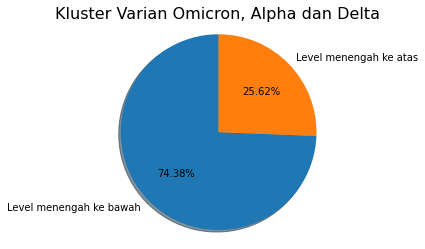

In [ ]:
jwb = ['Level menengah ke bawah', 'Level menengah ke atas']
percents = [90,31]
explode = (0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=jwb, autopct='%.2f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Kluster Varian Omicron, Alpha dan Delta', fontsize=16)
plt.show()

### **MODEL IMPLEMENTATION**

In [ ]:
X = df2[['Omicron', 'Alpha', 'Delta']]
y = df2['kluster']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape)

(96, 3) (25, 3)


In [ ]:
import sklearn.linear_model as lm

model = lm.LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
print(model.coef_)

[[1.14848376e-03 1.26328601e-04 8.64585684e-05]]


In [ ]:
y_prediksi = model.predict(X_test)
y_prediksi

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

In [ ]:
X_test.head()

,Omicron,Alpha,Delta
48,140,16439,26150
94,32,39,207
95,0,115,62
8,0,29,95
97,278,190,8504


In [ ]:
y_test.head(5)

48    1
94    0
95    0
8     0
97    0
Name: kluster, dtype: int64

### **CHECK MODEL**

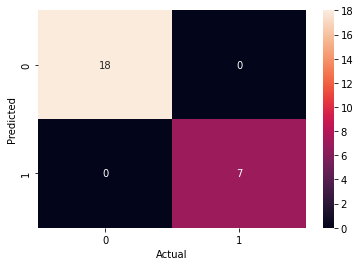

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_prediksi, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print(classification_report(y_test, y_prediksi))
print("accuracy: ", accuracy_score(y_test, y_prediksi))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         7

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

accuracy:  1.0


In [ ]:
import sklearn.metrics as met

auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

1.0


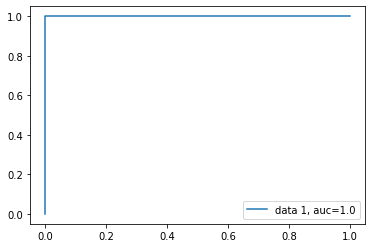

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fp, tp, _ = met.roc_curve(y_test, y_pred_proba)
auc = met.roc_auc_score(y_test, y_pred_proba)
plt.plot(fp,tp,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()